# Script to view S5p data
by Andrew Rowley

In [1]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes

In [2]:
#a##### https://github.com/acgeospatial/Sentinel-5P/blob/master/Sentinel_5P.ipynb

In [3]:
import netCDF4 as nc4
from netCDF4 import Dataset
import numpy as np

In [4]:
my_example_nc_file = r'NO2_Prediction/data/sample_data/s5p/S5P_NRTI_L2__NO2____20220810T130218_20220810T130718_25000_03_020400_20220810T134332.nc'
nc_Dataset = Dataset(my_example_nc_file, mode='r')

In [5]:
print(nc_Dataset.file_format)

NETCDF4


In [6]:
print(nc_Dataset.groups['PRODUCT'].variables.keys())

dict_keys(['scanline', 'ground_pixel', 'time', 'corner', 'polynomial_exponents', 'intensity_offset_polynomial_exponents', 'layer', 'vertices', 'latitude', 'longitude', 'delta_time', 'time_utc', 'qa_value', 'nitrogendioxide_tropospheric_column', 'nitrogendioxide_tropospheric_column_precision', 'nitrogendioxide_tropospheric_column_precision_kernel', 'averaging_kernel', 'air_mass_factor_troposphere', 'air_mass_factor_total', 'tm5_tropopause_layer_index', 'tm5_constant_a', 'tm5_constant_b'])


In [24]:
print(nc_Dataset.groups['PRODUCT'].variables["time_utc"])

<class 'netCDF4._netCDF4.Variable'>
vlen time_utc(time, scanline)
    long_name: Time of observation as ISO 8601 date-time string
    _FillValue: 
vlen data type: <class 'str'>
path = /PRODUCT
unlimited dimensions: 
current shape = (1, 372)


In [7]:
# https://joehamman.com/2013/10/12/plotting-netCDF-data-with-Python/

In [8]:
lons = nc_Dataset.groups['PRODUCT'].variables['longitude'][:][0,:,:]
lats = nc_Dataset.groups['PRODUCT'].variables['latitude'][:][0,:,:]
no2 = nc_Dataset.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column_precision'][0,:,:]
print (lons.shape)
print (lats.shape)
print (no2.shape)

no2_units = nc_Dataset.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column_precision'].units

(372, 450)
(372, 450)
(372, 450)


C:\Users\c21081077\AppData\Local\Temp\ipykernel_2220\3957676262.py:5: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(lons, lats, no2, cmap='hot')


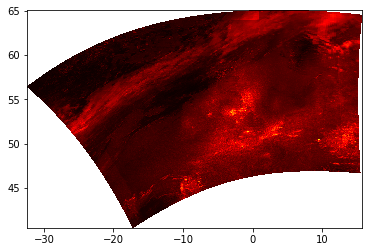

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.pcolor(lons, lats, no2, cmap='hot')
plt.show()

C:\Users\c21081077\AppData\Roaming\Python\Python39\site-packages\matplotlib\image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


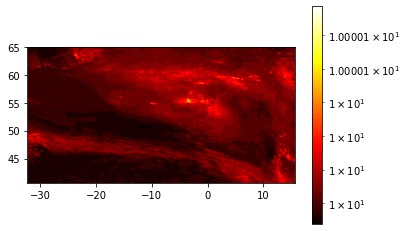

In [10]:
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

plt.imshow(no2+10, extent=(np.amin(lons), np.amax(lons), np.amin(lats), np.amax(lats)),
        cmap=cm.hot, norm=LogNorm())
plt.colorbar()
plt.show()

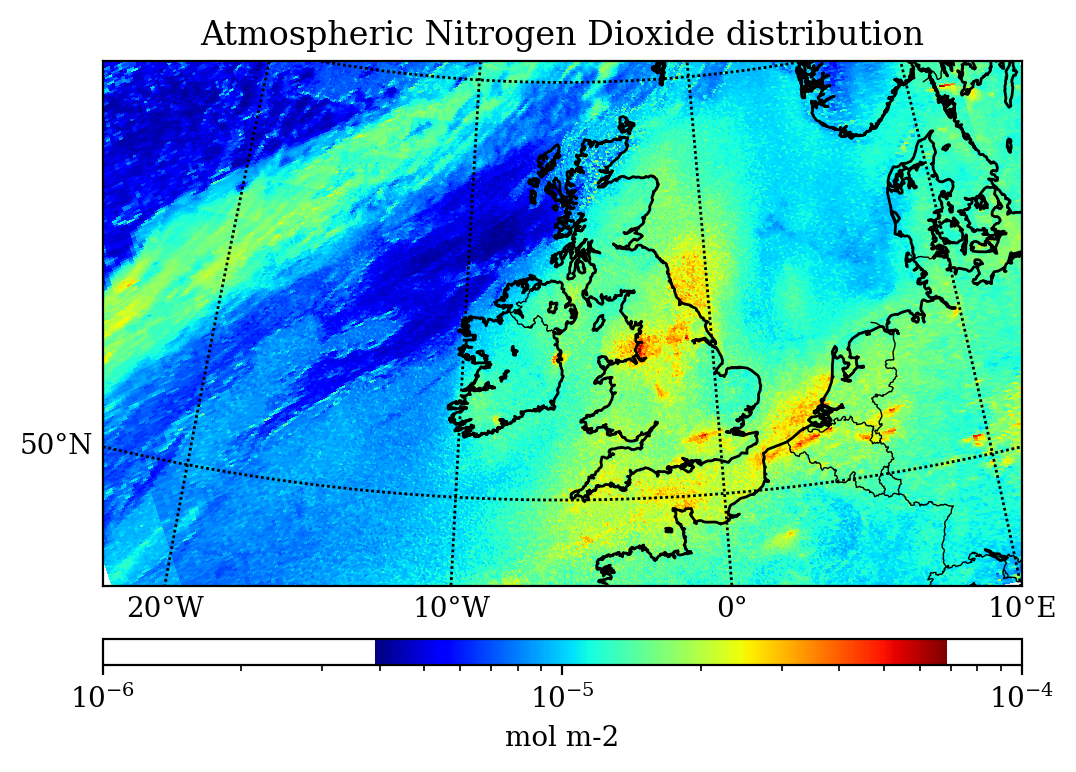

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl

mpl.rcParams['figure.dpi']= 200
mpl.rcParams['font.family'] = 'serif'

lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(width=2450000,height=1400000,
            resolution='i',
            projection='tmerc',\
            lat_ts=45,lat_0=lat_0,lon_0=lon_0)

xi, yi = m(lons, lats)

# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(no2),norm=LogNorm(), cmap='jet')

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_ticks([0.000001,0.00001,0.0001])
cbar.set_label(no2_units)

# Add Title
plt.title('Atmospheric Nitrogen Dioxide distribution')
# plt.figsize = (100,12)
# plt.dpi = 500
plt.show()

In [14]:
nc_Dataset['/PRODUCT']

<class 'netCDF4._netCDF4.Group'>
group /PRODUCT:
    dimensions(sizes): scanline(372), ground_pixel(450), corner(4), time(1), polynomial_exponents(6), intensity_offset_polynomial_exponents(1), layer(34), vertices(2)
    variables(dimensions): int32 scanline(scanline), int32 ground_pixel(ground_pixel), int32 time(time), int32 corner(corner), int32 polynomial_exponents(polynomial_exponents), int32 intensity_offset_polynomial_exponents(intensity_offset_polynomial_exponents), int32 layer(layer), int32 vertices(vertices), float32 latitude(time, scanline, ground_pixel), float32 longitude(time, scanline, ground_pixel), int32 delta_time(time, scanline), <class 'str'> time_utc(time, scanline), uint8 qa_value(time, scanline, ground_pixel), float32 nitrogendioxide_tropospheric_column(time, scanline, ground_pixel), float32 nitrogendioxide_tropospheric_column_precision(time, scanline, ground_pixel), float32 nitrogendioxide_tropospheric_column_precision_kernel(time, scanline, ground_pixel), float32 

In [15]:
# example code from the scripts
# using xarray to open
# s5p_data = xr.open_dataset(os.path.join(self.datadir, "sentinel-5p", sample["s5p_path"])).rio.write_crs(4326)

In [16]:
# https://www.youtube.com/watch?v=aHzr43rSww4

#data set called "nc_Dataset"

#specify the latlong boundary
# 50.516221,-1.784594 bottom left
# 51.553850,-0.243101 top roght

#approx area of box drawn newforest to islington
latbound = [50.516,51.554]
lonbound = [-1.785,-0.243]

#remind ourselves of lat longs from dataset
# lons = nc_Dataset.groups['PRODUCT'].variables['longitude'][:][0,:,:]
# lats = nc_Dataset.groups['PRODUCT'].variables['latitude'][:][0,:,:]

In [17]:
# create a times list too
time = nc_Dataset.groups['PRODUCT'].variables['time'][:]
print(time)

[397785600]


In [18]:
%matplotlib inline
import os
import xarray as xr
import numpy as np
import netCDF4 as nc
import pandas as pd

from IPython.display import HTML

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.cm import get_cmap
from matplotlib import animation

from matplotlib.axes import Axes
from matplotlib.axes import Axes
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
warnings.simplefilter(action = "ignore", category = UserWarning)
GeoAxes._pcolormesh_patched = Axes.pcolormesh

In [19]:
#another approach
#https://dustbook.ltpy.adamplatform.eu/docs/sentinel5p_ai.html
#this is like an official ESA one

import xarray as xr
data5p = xr.open_dataset(my_example_nc_file, group='PRODUCT')
print(data5p)

<xarray.Dataset>
Dimensions:                                               (scanline: 372,
                                                           ground_pixel: 450,
                                                           time: 1, corner: 4,
                                                           polynomial_exponents: 6,
                                                           intensity_offset_polynomial_exponents: 1,
                                                           layer: 34,
                                                           vertices: 2)
Coordinates:
  * scanline                                              (scanline) float64 ...
  * ground_pixel                                          (ground_pixel) float64 ...
  * time                                                  (time) datetime64[ns] ...
  * corner                                                (corner) float64 0....
  * polynomial_exponents                                  (polynomial_exponents) 

In [20]:
no2 = data5p['nitrogendioxide_tropospheric_column_precision']
no2

<xarray.DataArray 'nitrogendioxide_tropospheric_column_precision' (time: 1,
                                                                   scanline: 372,
                                                                   ground_pixel: 450)>
[167400 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 3.0 ... 368.0 369.0 370.0 371.0
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
  * time          (time) datetime64[ns] 2022-08-10
    latitude      (time, scanline, ground_pixel) float32 ...
    longitude     (time, scanline, ground_pixel) float32 ...
Attributes:
    units:                                                 mol m-2
    standard_name:                                         troposphere_mole_c...
    long_name:                                             Precision of the t...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

In [21]:
no2_example = no2[0,:,:]
no2_example

<xarray.DataArray 'nitrogendioxide_tropospheric_column_precision' (
                                                                   scanline: 372,
                                                                   ground_pixel: 450)>
[167400 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 3.0 ... 368.0 369.0 370.0 371.0
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 2022-08-10
    latitude      (scanline, ground_pixel) float32 ...
    longitude     (scanline, ground_pixel) float32 ...
Attributes:
    units:                                                 mol m-2
    standard_name:                                         troposphere_mole_c...
    long_name:                                             Precision of the t...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

In [22]:
longname = no2_example.long_name
units = no2_example.units

longname, units

('Precision of the tropospheric vertical column of nitrogen dioxide',
 'mol m-2')

In [23]:
#from https://dust.ltpy.adamplatform.eu/user/arstudentdasa/lab/tree/functions.ipynb

def generate_geographical_subset(xarray, latmin, latmax, lonmin, lonmax, reassign=False):
    """ 
    Generates a geographical subset of a xarray.DataArray and if kwarg reassign=True, shifts the longitude grid 
    from a 0-360 to a -180 to 180 deg grid.
    
    Parameters:
        xarray(xarray.DataArray): a xarray DataArray with latitude and longitude coordinates
        latmin, latmax, lonmin, lonmax(int): lat/lon boundaries of the geographical subset
        reassign(boolean): default is False
        
    Returns:
        Geographical subset of a xarray.DataArray.
    """   
    if(reassign):
        xarray = xarray.assign_coords(longitude=(((xarray.longitude + 180) % 360) - 180))
    return xarray.where((xarray.latitude < latmax) & (xarray.latitude > latmin) & (xarray.longitude < lonmax) & (xarray.longitude > lonmin),drop=True)

In [24]:
def visualize_pcolormesh(data_array, longitude, latitude, projection, color_scale, unit, long_name, vmin, vmax, 
                         set_global=True, lonmin=-180, lonmax=180, latmin=-90, latmax=90):
    """ 
    Visualizes a xarray.DataArray with matplotlib's pcolormesh function.
    
    Parameters:
        data_array(xarray.DataArray): xarray.DataArray holding the data values
        longitude(xarray.DataArray): xarray.DataArray holding the longitude values
        latitude(xarray.DataArray): xarray.DataArray holding the latitude values
        projection(str): a projection provided by the cartopy library, e.g. ccrs.PlateCarree()
        color_scale(str): string taken from matplotlib's color ramp reference
        unit(str): the unit of the parameter, taken from the NetCDF file if possible
        long_name(str): long name of the parameter, taken from the NetCDF file if possible
        vmin(int): minimum number on visualisation legend
        vmax(int): maximum number on visualisation legend
        set_global(boolean): optional kwarg, default is True
        lonmin,lonmax,latmin,latmax(float): optional kwarg, set geographic extent is set_global kwarg is set to 
                                            False

    """
    fig=plt.figure(figsize=(20, 10))

    ax = plt.axes(projection=projection)

#    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10),subplot_kw=dict(projection=projection))
   
    img = ax.pcolormesh(longitude, latitude, data_array, 
                        cmap=plt.get_cmap(color_scale), transform=ccrs.PlateCarree(),
                        vmin=vmin,
                        vmax=vmax,
                        shading='auto')

    ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
    ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)

    if (projection==ccrs.PlateCarree()):
        ax.set_extent([lonmin, lonmax, latmin, latmax], projection)
        gl = ax.gridlines(draw_labels=True, linestyle='--')
        gl.top_labels=False
        gl.right_labels=False
        gl.xformatter=LONGITUDE_FORMATTER
        gl.yformatter=LATITUDE_FORMATTER
        gl.xlabel_style={'size':14}
        gl.ylabel_style={'size':14}

    if(set_global):
        ax.set_global()
        ax.gridlines()

    cbar = fig.colorbar(img, ax=ax, orientation='horizontal', fraction=0.04, pad=0.1)
    cbar.set_label(unit, fontsize=16)
    cbar.ax.tick_params(labelsize=14)
    ax.set_title(long_name, fontsize=20, pad=20.0)

 #   plt.show()
    return fig, ax

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Precision of the tropospheric vertical column of nitrogen dioxide 2022-08-10T00:00:00.000000000'}>)

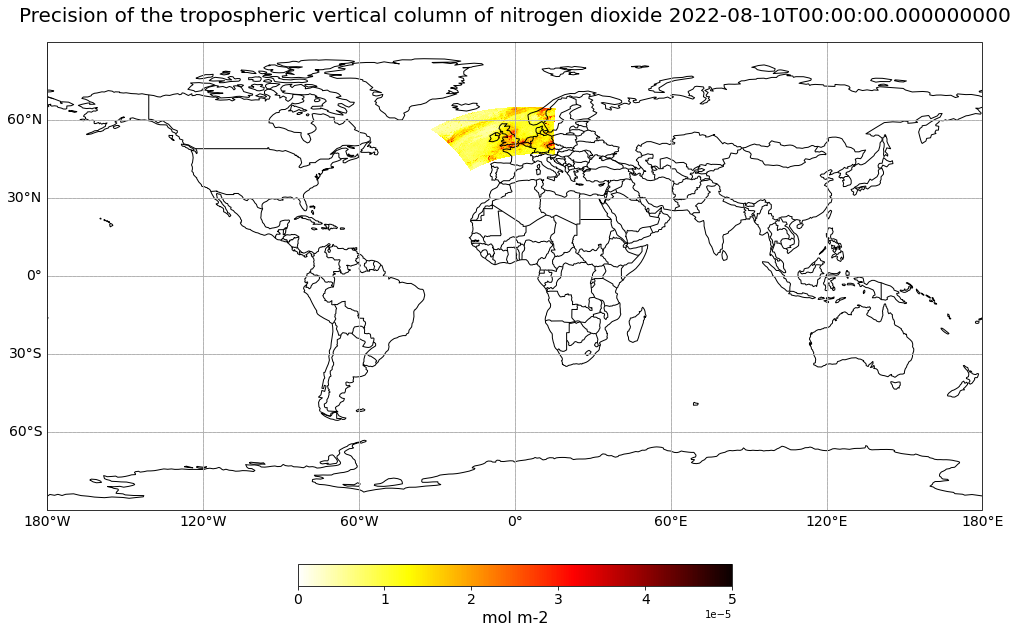

In [25]:
visualize_pcolormesh(data_array=no2_example,
                     longitude=no2_example.longitude,
                     latitude=no2_example.latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='hot_r',
                     unit=units,
                     long_name=longname + ' ' + str(no2_example.time.data),
                     vmin=0, 
                     vmax=0.00005,
                     lonmin=-180, 
                     lonmax=180,
                     latmin=-90,
                     latmax=90,
                     set_global=True)

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Precision of the tropospheric vertical column of nitrogen dioxide 2022-08-10T00:00:00.000000000'}>)

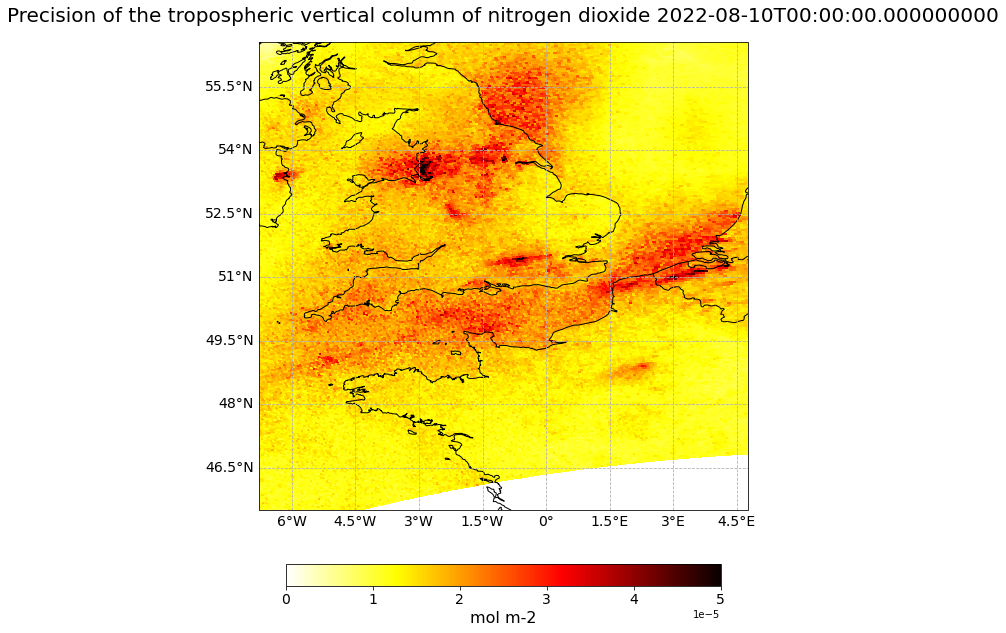

In [26]:
visualize_pcolormesh(data_array=no2_example,
                     longitude=no2_example.longitude,
                     latitude=no2_example.latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='hot_r',
                     unit=units,
                     long_name=longname + ' ' + str(no2_example.time.data),
                     vmin=0, 
                     vmax=0.00005,
                     lonmin=lonbound[0]-5, 
                     lonmax=lonbound[1]+5,
                     latmin=latbound[0]-5,
                     latmax=latbound[1]+5,
                     set_global=False)

In [27]:
print(latbound)
print(lonbound)

[50.516, 51.554]
[-1.785, -0.243]


In [28]:
subset = generate_geographical_subset(no2, latbound[0], latbound[1], lonbound[0], lonbound[1], reassign=False)

In [29]:
subset_example = generate_geographical_subset(no2_example, latbound[0], latbound[1], lonbound[0], lonbound[1], reassign=False)

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Precision of the tropospheric vertical column of nitrogen dioxide 2022-08-10T00:00:00.000000000'}>)

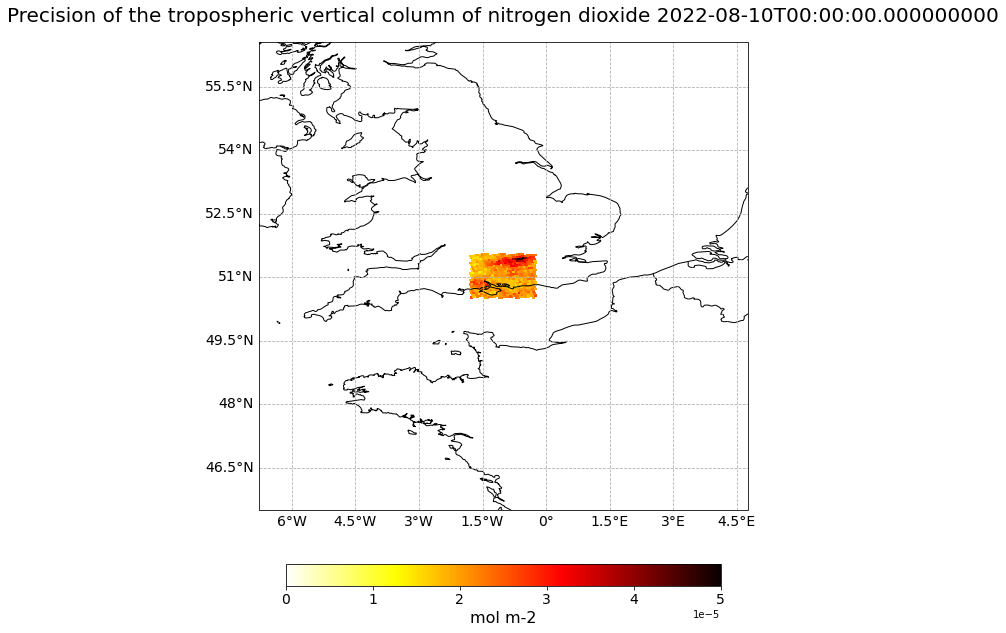

In [30]:
visualize_pcolormesh(data_array=subset_example,
                     longitude=subset_example.longitude,
                     latitude=subset_example.latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='hot_r',
                     unit=units,
                     long_name=longname + ' ' + str(subset_example.time.data),
                     vmin=0, 
                     vmax=0.00005,
                     lonmin=lonbound[0]-5, 
                     lonmax=lonbound[1]+5,
                     latmin=latbound[0]-5,
                     latmax=latbound[1]+5,
                     set_global=False)

In [31]:
# send the "subset" file to the local computer as a netcdf
# Dataset.to_netcdf(path=None, mode='w', format=None,
#                   group=None, engine=None, encoding=None, 
#                   unlimited_dims=None, compute=True, invalid_netcdf=False)

print_path =  r'NO2_Prediction/sample_data/s5p_subset.netcdf'
#subset.to_netcdf(path=print_path,mode='w',format="NETCDF4" )